---
title: "Metody głębokiego uczenia, projekt nr 1"
subtitle: "Własna implementacja algorytmu wstecznej propagacji błędu w perceptronie wielowarstwowym (MLP)"
author:
- Tymoteusz Makowski
- Olaf Skrabacz
date: "19 marca 2019"
documentclass: scrartcl
geometry: margin=2.5cm
---
\thispagestyle{empty}
\newpage

# Opis zadania

Celem projektu była implementacja perceptronu wielowarstwowego (ang. *multilayer perceptron*) z szeregiem wymaganych funkcjonalności takich jak:

* wybór liczby warstw oraz liczby neuronów ukrytych w każdej warstwie,
* wybór funkcji aktywacji,
* możliwość ustawienia:
    * liczby iteracji,
    * wartości współczynnika nauki (ang. *learning rate*),
    * wartości współczynnika bezwładności,
* możliwość zastosowania sieci zarówno do klasyfikacji, jak i do regresji.

# Implementacja

Do wykonania zadania projektowego wybraliśmy język programowania Python3 i skorzystaliśmy z jego możliwości obiektowych.

## Funkcje aktywacji

Zaimplementowaliśmy wiele funkcji aktywacji, które można wybierać dla poszczególnych warstw. Oprócz funkcji liniowej zaimplementowaliśmy:

### *ReLU* (Rectified Linear Unit)
\begin{equation}
\mathrm{relu}(x) = \begin{cases}
x, & x>0\\
0, & x\leq0
\end{cases}
\end{equation}

### Funkcja sigmoidalna
\begin{equation}
\mathrm{sigmoid}(x) = \frac{\mathrm{e}^x}{1 + \mathrm{e}^x}
\end{equation}

### Funkcja *tanh*
\begin{equation}
\tanh(x) = \frac{2}{1 + \mathrm{e}^{-2x}} - 1
\end{equation}

### Funkcja wektorowa *softmax*
\begin{equation}
\mathrm{softmax}\big( (x_i)_{i=1}^n \big) = \bigg( \frac{\mathrm{e}^{x_i}}{\sum_{j=1}^n \mathrm{e}^{x_j}} \bigg)_{i=1}^n
\end{equation}

## Funkcje straty

W projekcie są do wyboru dwa sposoby obliczania strat. Jest to błąd średniokwadratowy (ang. *mean squared error*) oraz entropia krzyżowa (ang. *cross entropy*). Pierwsza metoda jest wykorzystywana do regresji, zaś druga do klasyfikacji.

## Klasa warstwy `Layer`

Podczas tworzenia każdej z warstw podajemy następujące parametry:

* liczba neuronów, którą ma zawierać ta warstwa,
* liczba neuronów poprzedniej warstwy albo, w przypadku pierwszej warstwy, wymiar danych wejściowych,
* jedna z funkcji aktywacji wymienionych powyżej.
 
Przykład tworzenia warstwy o 3 neuronach, gdzie dane wejściowe mają dwa wymiary (albo poprzednia warstwa ma dwa neurony), a funkcją aktywacji jest funkcja sigmoidalna:

>     Layer(3, 2, "sigmoid")

Klasa `Layer` nie zawiera metod, które są wykorzystywane z perspektywy użytkownika.

## Klasa sieci `NeuralNetwork`

Konstruktor klasy `NeuralNetwork` przyjmuje następujące parametry:

* rodzaj funkcji błędu,
* wartość współczynnika bezwładności.

Klasa ta zawiera dwie główne metody -- `add` oraz `train`, które służą do, odpowiednio, dodawania warstwy do sieci i ćwiczenia sieci. Funkcja `train`, oprócz nauki, zwraca na koniec wartości funkcji straty na zbiorze treningowym w kolejnych etapach procesu uczenia.

Przykład budowy i uczenia, sieci dwuwarstwowej o liczbie neuronów, kolejno, 1 i 2, do klasyfikacji zbioru na płaszczyźnie.

>     nn = NeuralNetwork("cross_entropy", momentum=0)
>     nn.add(Layer(1, 2, "relu"))
>     nn.add(Layer(2, 2, "softmax"))
>     nn.train(X=train_set_X, Y=train_set_y, epochs=30, learning_rate=0.01)

Gdzie `train_set_X` i `train_set_y` to dane treningowe, `epochs` to liczba iteracji uczenia, a `learning_rate` to współczynnik nauki.

# Regresja

## Wczytanie pakietów

>     import numpy as np
>     import pandas as pd
>     from NeuralNetwork import NeuralNetwork
>     from Layer import Layer
>     import matplotlib.pyplot as plt
>     import seaborn as sns
>     from copy import deepcopy
>     import numpy as np

>     from matplotlib import animation, rc
>     from IPython.display import HTML
>     sns.set_style("darkgrid")
>     np.random.seed(1337)

### Zbiór 1  - Activation

Wczytajmy dane.

In [2]:
>     df = pd.read_csv("Regression//data.activation.train.100.csv")
>     df_test = pd.read_csv("Regression//data.activation.test.100.csv")

Wizualizacjia zbiorów.

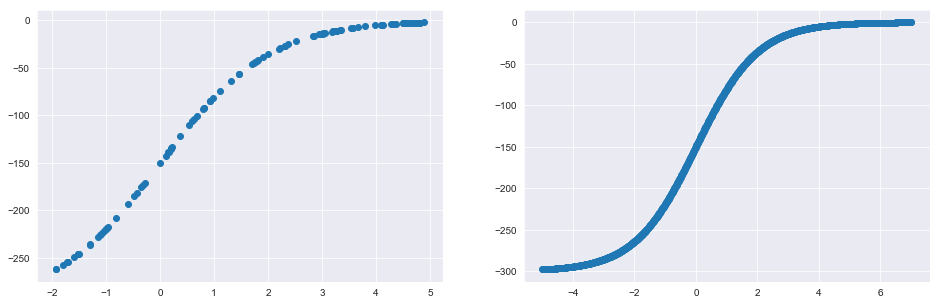

In [3]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.scatter(df['x'], df['y'])
>     plt.subplot(1, 2, 2)
>     plt.scatter(df_test['x'], df_test['y'])

Jak widać obserwacje ze zbioru testowego pochodzą z tego samego rozkładu, jedyny problem może być z zakresem x, który dla zbioru testowego jest trochę większy niż dla zbioru treningowego.

Spróbujmy nauczyć sieć o jednej warstwie i liniowej funkcji aktywacji, by zobaczyć jak spróbuje przybliżyć dane.  
Ponieważ jest to problem regresji, to na ostatniej warstwie użyjemy liniowej warstwy aktywacji, oraz błędu średniokwadratowego jako funkcji straty. Narazie nie będziemy korzystać z momentum.  

In [4]:
>     X = df['x'].values.reshape(-1,1); y = df['y'].values.reshape(-1,1)
>     X_test = df_test['x'].values.reshape(-1,1); y_test = df_test['y'].values.reshape(-1,1)

In [12]:
>     nn = NeuralNetwork(loss="mse", momentum=0)
>     nn.add(Layer(units=1, input_shape=1, activation_function="linear"))

In [13]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=500, learning_rate=1e-2, momentum=0, verbose=False)

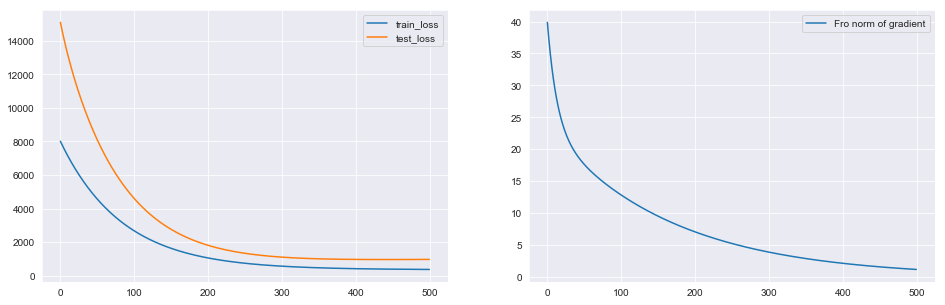

In [14]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

Jak widać sieć zbiegła już w około 4000 epoku, co widać również po sumie norm Frobeniusa wszystkich gradientów wag w sieci widocznych na drugim wykresie.   
Sieć ma troche większy błąd na zbiorze testowym co może wynikać z natury danych (inny zakres x).  
Zobaczmy jak wygląda predkycja sieci na zbiorze testowym.

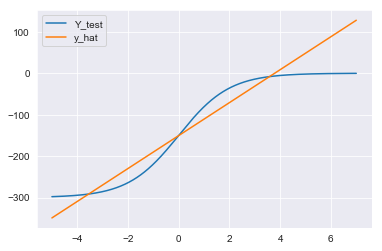

In [11]:
>     plt.plot(df_test['x'], df_test['y'], label='Y_test')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()

Sieć poprawnie przybliżyła dane w sposób liniowy.   
Jednowarstwowa sieć z liniową funkcją aktywacji jest bardzo prosto interpretowalna jako prosta liniowa. Uczenie tej sieci możemy traktować jak szukanie prostej regresji liniowej metodą spadku gradientu. Zobaczmy na wagi w tej wartswie. Jeśli prostą zdefiniujemy jako $y = ax + b$ to waga tej sieci to $a$, a bias to $b$.

In [9]:
>     nn.layers[1].W, nn.layers[1].B

(array([[39.75441475]]), array([[-150.39044024]]))

Zgadza się to z wartościami widocznymi na wykresie predykcji sieci neuronowej.

Zobaczmy teraz czy dodanie liniowych warstw poprawi wynik działania sieci.

In [10]:
>     nn = NeuralNetwork(loss="mse", momentum=0)
>     nn.add(Layer(units=5, input_shape=1, activation_function="linear"))
>     nn.add(Layer(units=5, input_shape=5, activation_function="linear"))
>     nn.add(Layer(units=1, input_shape=5, activation_function="linear"))

In [11]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=100, learning_rate=1e-3, momentum=0, verbose=False)

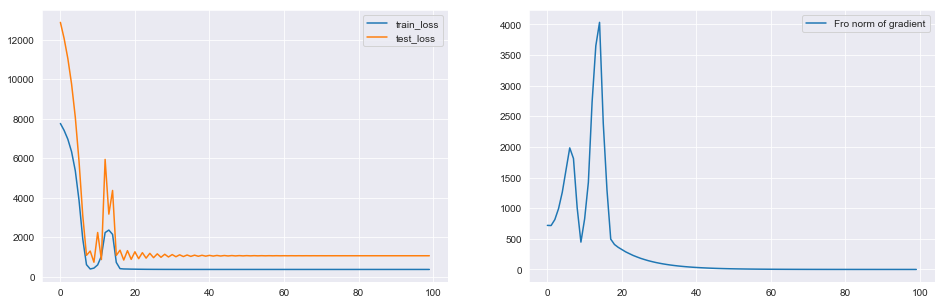

In [12]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

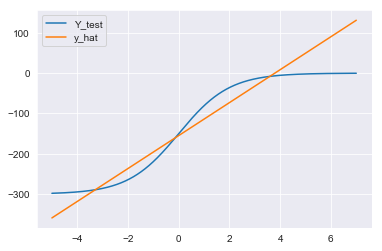

In [13]:
>     plt.plot(df_test['x'], df_test['y'], label='Y_test')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()

Pomimo dodania warstw liniowych predykcja sieci się nie bardzo nie zmieniła. Jest to zgodne z teorią, ponieważ sieć z dowolną liczbą warstw tylko liniowych jesteśmy w stanie przedstawic jako sieć jednej warstwie liniowej. Sieć również dużo szybciej zbiegła jednak może to wynikać z losowo dobrze trafionej aktywacji.

Skoro dodanie warstw liniowych nic nie dało dodajmy warstwy nieliniowe.  
Dostępne funkcje aktywacji to:   
    1) relu,  
    2) sigmoid,  
    3) tanh,  
    4) softmax,  

Zróbmy podobną sieć tylko zastąpmy aktywację warstw głębokich na `relu`

In [14]:
>     nn = NeuralNetwork(loss="mse", momentum=0)
>     nn.add(Layer(units=5, input_shape=1, activation_function="relu"))
>     nn.add(Layer(units=5, input_shape=5, activation_function="relu"))
>     nn.add(Layer(units=1, input_shape=5, activation_function="linear"))

In [15]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=100, learning_rate=1e-3, momentum=0, verbose=False)

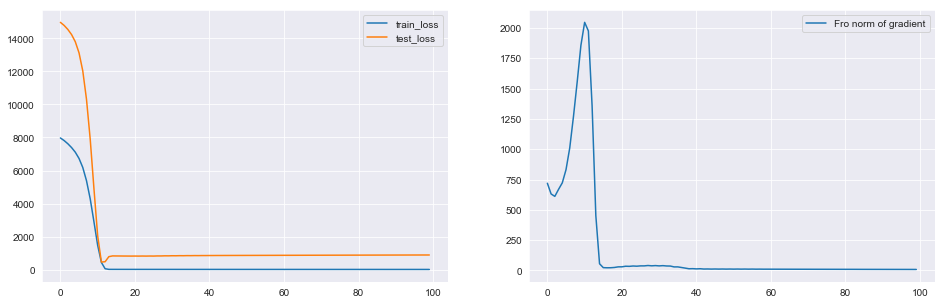

In [16]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

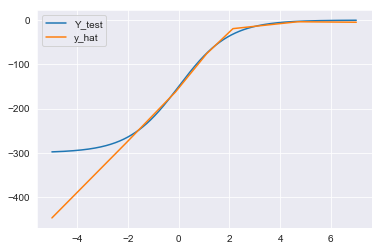

In [17]:
>     plt.plot(df_test['x'], df_test['y'], label='Y_test')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()

Widać już nielinowość w predykcji sieci. Dodatkowo nieliniowość ma podobne złamanie to funckja `relu` w 0. Widać również że większy błąd sieci pojawia się głównie w części której nie było w zbiorze treningowym.  
Narazie uczyliśmy naszą sieć na małej liczbie obserwacji. Sprawdźmy jak wygląda predkycja zależnie od liczby obserwacji w zbiorze uczącym, oraz jak szybko sieć zbiega. Wykorzystamy architekturę sieci z poprzedniego przykładu.

In [18]:
>     no_obs = [100,500, 1000, 10000]

In [19]:
>     trains = []
>     tests = []
>     for obs in no_obs:
>         trains.append(pd.read_csv(f"Regression//data.activation.train.{obs}.csv"))
>         tests.append(pd.read_csv(f"Regression//data.activation.test.{obs}.csv"))

In [22]:
>     def define_network():
>         nn = NeuralNetwork(loss="mse", momentum=0)
>         nn.add(Layer(units=5, input_shape=1, activation_function="relu"))
>         nn.add(Layer(units=5, input_shape=5, activation_function="relu"))
>         nn.add(Layer(units=1, input_shape=5, activation_function="linear"))
>         return nn

Poniższe cztery pary wykresów pokazują błąd na zbiorze traingowym, testowym oraz norme gradientu dla zbiorów o odpowiednio 100, 500, 1000 i 10000 obserwacji. Ważne jest również by każda sieć byłą inicliaziowana z tym samym ziarnem, by wagi startowe były te same.

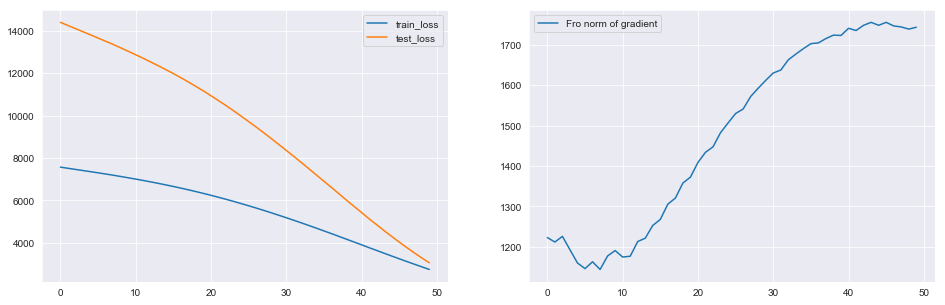

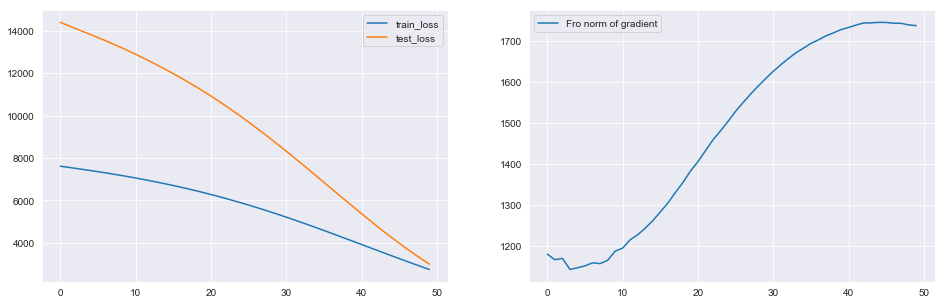

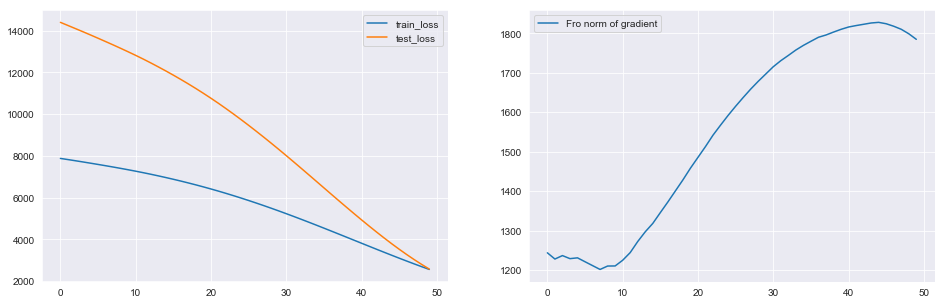

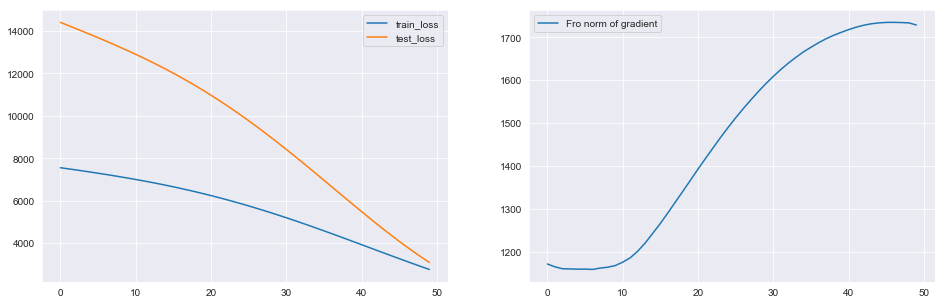

In [27]:
>     nn = define_network()
>     for train, test in zip(trains, tests):
>         X = train['x'].values.reshape(-1,1); y = train['y'].values.reshape(-1,1)
>         X_test = test['x'].values.reshape(-1,1); y_test = test['y'].values.reshape(-1,1)
>         nn2 = deepcopy(nn)
>         loss, test_loss, grad_norm = nn2.train(X, y, X_test, y_test, epochs=50, learning_rate=1e-4, momentum=0, verbose=False)
>         plt.figure(figsize=(16,5))
>         plt.subplot(1, 2, 1)
>         plt.plot(loss, label='train_loss')
>         plt.plot(test_loss, label='test_loss')
>         plt.legend()
>         plt.subplot(1,2,2)
>         plt.plot(grad_norm, label='Fro norm of gradient')
>         plt.legend()

Na powyższych wykresach widać, że wraz z wzrostem liczby obserwacji w zbiorze testowym zwiększa szybkość uczenia, tzn. w tylu samych epokach sieć jest w stanie osiągnąć niższy błąd. Niestety taka sieć uczy się znacznie dłużej(pod względem czasu obliczeniowego).

### Zbiór 2 - Cube

Weźmiemy zbiory z 1000 obserwacjami.

In [2]:
>     df = pd.read_csv("Regression//data.cube.train.10000.csv")
>     df_test = pd.read_csv("Regression//data.cube.test.10000.csv")

In [3]:
>     X = df['x'].values.reshape(-1,1); y = df['y'].values.reshape(-1,1)
>     X_test = df_test['x'].values.reshape(-1,1); y_test = df_test['y'].values.reshape(-1,1)

Zobaczmy jak wyglądają zbiory.

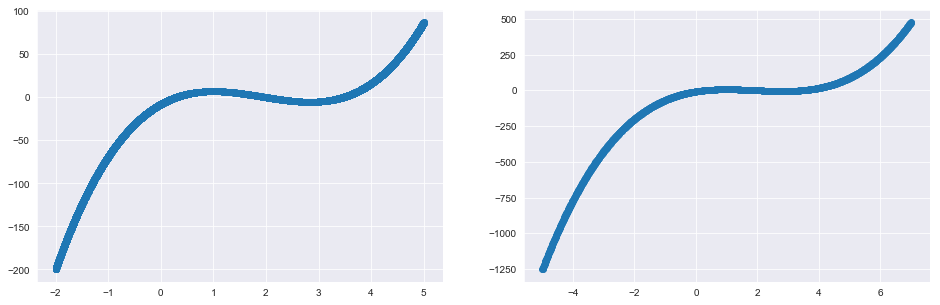

In [4]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.scatter(df['x'], df['y'])
>     plt.subplot(1, 2, 2)
>     plt.scatter(df_test['x'], df_test['y'])

Patrząc na zbiór od razu widać, że liniowe warstwy tu nie wystarczą, w tym przykładzie chciałbym porównać jak działają różne funkcję aktywacji. Skorzystamy z momentum, jednak szerzej przyjrzymy się temu zagadnieniu w następnych przykładach.

#### Sigmoid

In [24]:
>     nn = NeuralNetwork("mse", 0.8)
>     nn.add(Layer(units = 24, input_shape = 1, activation_function="sigmoid"))
>     nn.add(Layer(units = 24, input_shape = 24, activation_function="sigmoid"))
>     nn.add(Layer(units=1, input_shape=24, activation_function="linear"))

In [25]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=300,
>                                           learning_rate=1e-1, momentum=0.8, verbose=False)

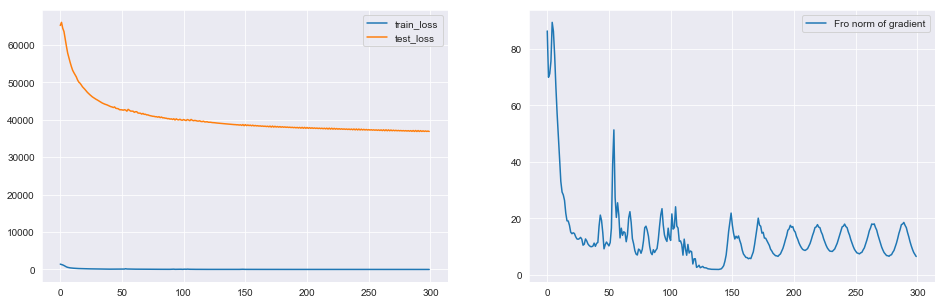

In [26]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

Predykcja:

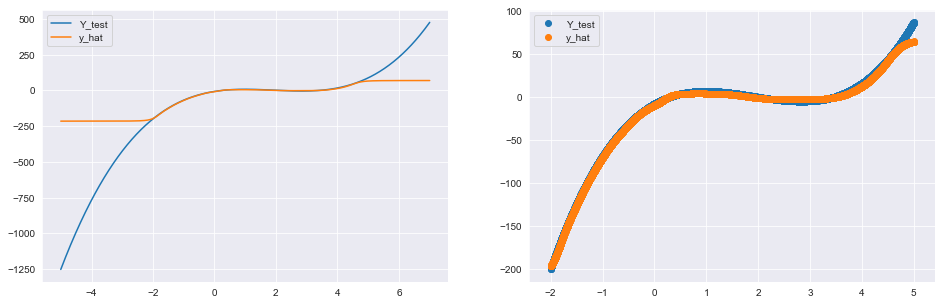

In [27]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1,2,1)
>     plt.plot(df_test['x'], df_test['y'], label='Y_test')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.scatter(df['x'], df['y'], label='Y_test')
>     plt.scatter(df['x'], nn.forward_pass(X), label='y_hat')
>     plt.legend()

Sieć bardzo słabo nauczyła się zbioru poza środkową częścią pod względem wartości X. Wynika to z różnicy między zakresem X w zbiorze treningowym i testowym. Jest ona  dobrze dopasowana do zbioru treningowego.

#### Relu

In [74]:
>     nn = NeuralNetwork("mse", 0.6)
>     nn.add(Layer(units = 24, input_shape = 1, activation_function="relu"))
>     nn.add(Layer(units = 12, input_shape = 24, activation_function="relu"))
>     nn.add(Layer(units=1, input_shape=12, activation_function="linear"))

In [75]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=1000,
>                                           learning_rate=1e-4, momentum=0.95, verbose=False)

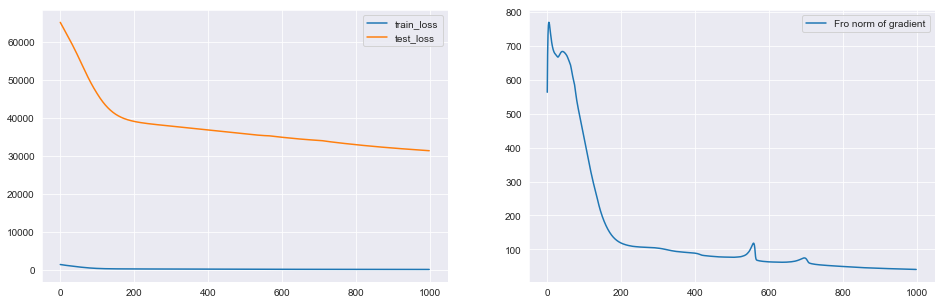

In [76]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

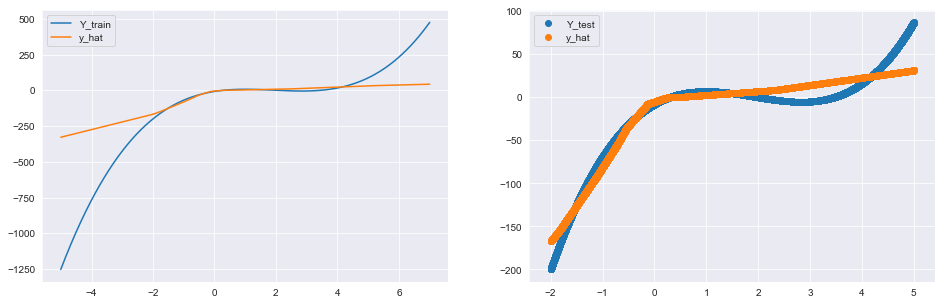

In [77]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1,2,1)
>     plt.plot(df_test['x'], df_test['y'], label='Y_train')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.scatter(df['x'], df['y'], label='Y_test')
>     plt.scatter(df['x'], nn.forward_pass(X), label='y_hat')
>     plt.legend()

Sieć z warstw relu ma podobny problem co sieć z sigmoidem, jednak dużo gorzej dopasowuje się do zbioru treningowego. Może wynikać to z natury funkcji aktywacji, która nie jest tak gładka jak funkcja `sigmoid`.   
Ucząc te dwie sieci zauważamy, że sieć relu ma znacznie wyższe normy gradientów co wynika z zachowania pochodnej oraz funkcji aktywacji która dla dodatnich `x` jest liniowa. Dlatego uczać sieć relu korzystamy z znacznie niższego `learning_rate`. Gdyby zastosować takie jak w uczeniu poprzedniej sieci bardzo możliwe że natkniemy się na wybuch gradientu i problemy numeryczne.

### Zbiór 3 - Linear

In [78]:
>     df = pd.read_csv("Regression//data.linear.train.1000.csv")
>     df_test = pd.read_csv("Regression//data.linear.test.1000.csv")

In [79]:
>     X = df['x'].values.reshape(-1,1); y = df['y'].values.reshape(-1,1)
>     X_test = df_test['x'].values.reshape(-1,1); y_test = df_test['y'].values.reshape(-1,1)

Zobaczmy jak wyglądają zbiory

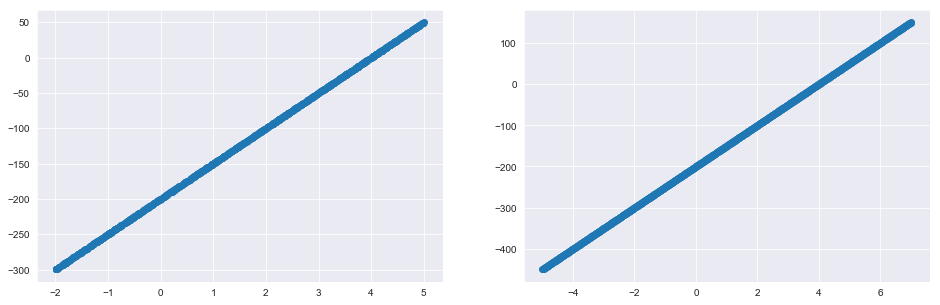

In [80]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.scatter(df['x'], df['y'])
>     plt.subplot(1, 2, 2)
>     plt.scatter(df_test['x'], df_test['y'])

Jak widać dane generowane są z funkcji liniowej `f(x) = ax + b`. Chcemy zatem stworzyć sieć, która na podstawie danych nauczy się parametrów `a` i `b`. By to zrobić stworzymy sieć jednowarstwową i zobaczymy jak wyglądaja wagi w kolejnych iteracjach uczenia.  
Dla naszych danych `b=-200` i `a=50`.

In [5]:
>     nn = NeuralNetwork("mse", momentum = 0)
>     nn.add(Layer(units=1, input_shape=1, activation_function="linear"))

Tworzymy siatkę parametrów `a` i `b` od -400 do 400, 1000 wartości

In [9]:
>     X_grid = np.linspace(-400, 400, 50)
>     Y_grid = np.linspace(-400,400,50)

In [10]:
>     xx,yy = np.meshgrid(X_grid,Y_grid)
>     flat_x, flat_y = xx.flatten().tolist(), yy.flatten().tolist()
>     z = np.zeros_like(flat_x)

Liczymy błąd mse w zależności od wartości parametrów W i DB

In [11]:
>     for i in range(len(flat_x)):
>         nn.layers[1].W = np.array([[flat_x[i]]])
>         nn.layers[1].B = np.array([[flat_y[i]]])
>         z[i] = nn.calculate_loss(X,y).mean()

Dostajemy wykres konturowy gdzie kolor oznacza wartość funkcji straty dla sieci o danych parametrach. Ciemny niebieski oznacza minimum. Zobaczmy jak metoda spadku gradientu porusza się po tej sieci.

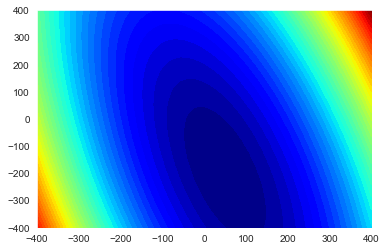

In [12]:
>     plt.contourf(xx,yy,z.reshape(xx.shape[0],xx.shape[1]), 50, cmap=plt.cm.jet)

In [13]:
>     nn = NeuralNetwork("mse", momentum = 0)
>     nn.add(Layer(units=1, input_shape=1, activation_function="linear"))
>     W = []
>     B = []
>     for i in range(10):
>         W.append(nn.layers[1].W[0][0])
>         B.append(nn.layers[1].B[0][0])
>         nn.train(X, y, epochs=50, momentum=0, verbose=0)

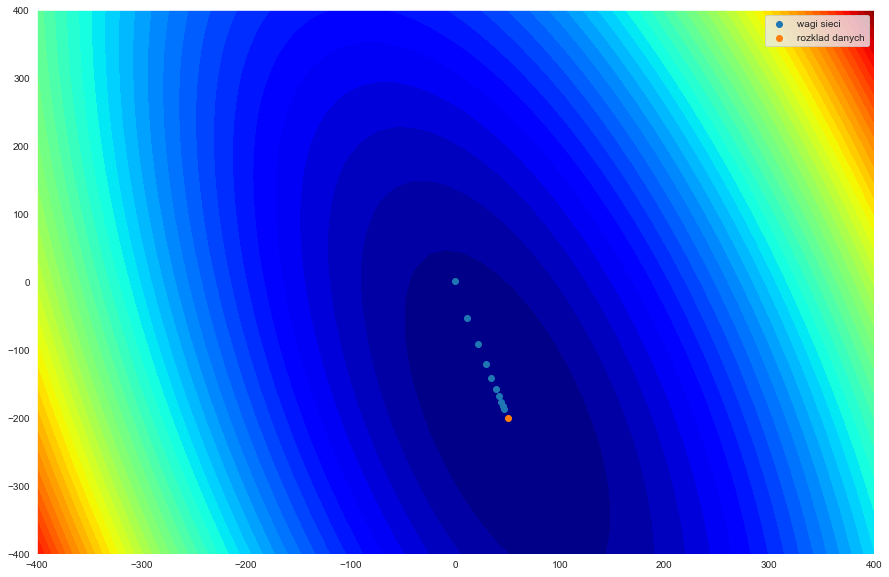

In [14]:
>     plt.figure(figsize=(15,10))
>     plt.contourf(xx,yy,z.reshape(xx.shape[0],xx.shape[1]), 50, cmap=plt.cm.jet)
>     plt.scatter(W, B, label='wagi sieci')
>     plt.scatter([50],[-200], label='rozklad danych')
>     plt.legend()
>     pass

Na wykresie widzimy jak sieć stopniowo zmienia wagi, tak by zbiegać do wag optymalnych. Proces ten jednak znacznie zwalnia wraz z zbliżaniem się do optymalnych wag.

Zobaczmy czy momentum coś zmienia w powyższym wykresie.

In [15]:
>     nn = NeuralNetwork("mse", momentum = 0.95)
>     nn.add(Layer(units=1, input_shape=1, activation_function="linear"))
>     W = []
>     B = []
>     for i in range(10):
>         W.append(nn.layers[1].W[0][0])
>         B.append(nn.layers[1].B[0][0])
>         nn.train(X, y, epochs=50, momentum=0.95, verbose=0)

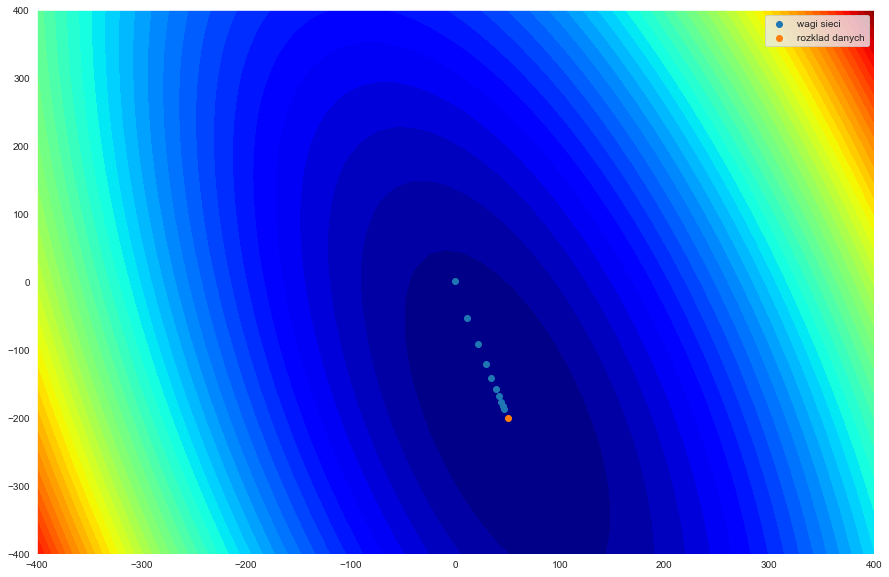

In [16]:
>     plt.figure(figsize=(15,10))
>     plt.contourf(xx,yy,z.reshape(xx.shape[0],xx.shape[1]), 50, cmap=plt.cm.jet)
>     plt.scatter(W, B, label='wagi sieci')
>     plt.scatter([50],[-200], label='rozklad danych')
>     plt.legend()
>     pass

Momentum za dużo nie zmienia ponieważ problem ten jest wypukły, tzn. mamy pewność że metoda gradientu zbiegnie do optymalnego punktu. Momentum przydaję się gdy istnieją poboczne lokalne minima, w których sieć może stanąć.

### Zbiór 4 - multimodal

In [144]:
>     df = pd.read_csv("Regression//data.multimodal.train.1000.csv")
>     df_test = pd.read_csv("Regression//data.multimodal.test.1000.csv")

In [145]:
>     X = df['x'].values.reshape(-1,1); y = df['y'].values.reshape(-1,1)
>     X_test = df_test['x'].values.reshape(-1,1); y_test = df_test['y'].values.reshape(-1,1)

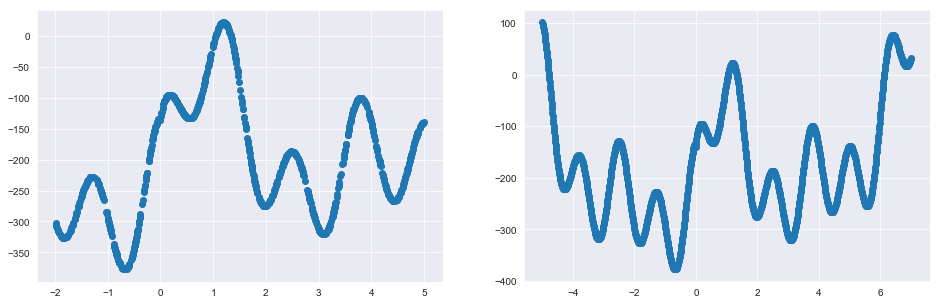

In [146]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.scatter(df['x'], df['y'])
>     plt.subplot(1, 2, 2)
>     plt.scatter(df_test['x'], df_test['y'])

Widać, że jest to najtrudniejszy problem dotychczas. Spróbujemy zbudować dużą sieć, która nauczy się powyższych zależności.

In [185]:
>     nn = NeuralNetwork("mse", momentum = 0.5)
>     nn.add(Layer(units=150, input_shape=1, activation_function="sigmoid"))
>     nn.add(Layer(units=1, input_shape=150, activation_function="linear"))

In [186]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=1000,
>                                           learning_rate=1e-2, momentum=0.5, verbose=False)>     

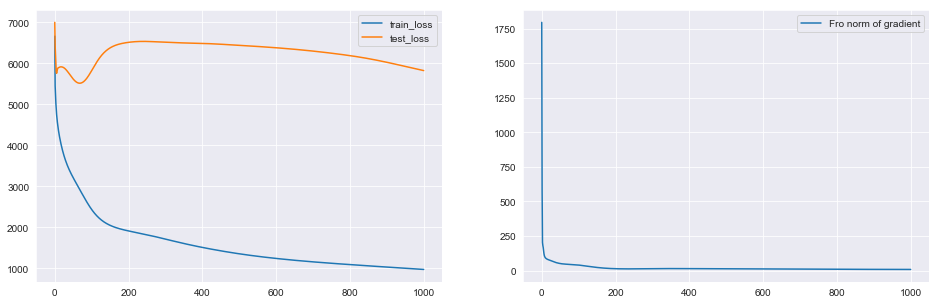

In [187]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

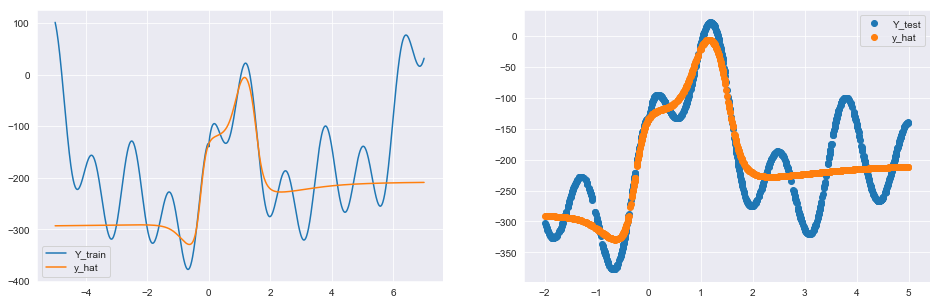

In [188]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1,2,1)
>     plt.plot(df_test['x'], df_test['y'], label='Y_train')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.scatter(df['x'], df['y'], label='Y_test')
>     plt.scatter(df['x'], nn.forward_pass(X), label='y_hat')
>     plt.legend()

Widać, że jest to bardzo trudny problem dla sieci i nie uczy się ona odpowiednio. Być może zwiększenie pojemności modelu pozwoli na lepsze dopasowanie do problemu.

### Zbiór 5 - square

In [190]:
>     df = pd.read_csv("Regression//data.square.train.1000.csv")
>     df_test = pd.read_csv("Regression//data.square.test.1000.csv")

In [191]:
>     X = df['x'].values.reshape(-1,1); y = df['y'].values.reshape(-1,1)
>     X_test = df_test['x'].values.reshape(-1,1); y_test = df_test['y'].values.reshape(-1,1)

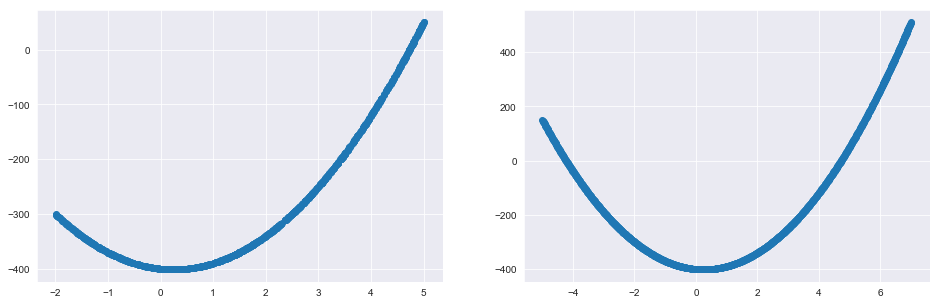

In [192]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.scatter(df['x'], df['y'])
>     plt.subplot(1, 2, 2)
>     plt.scatter(df_test['x'], df_test['y'])

Ostatni problem to funkcja kwadratowa z którą sieć o conajmniej jednej warstwie sigmoidalnej nie powinna mieć problemu.

In [207]:
>     nn = NeuralNetwork("mse", momentum = 0.5)
>     nn.add(Layer(units=50, input_shape=1, activation_function="sigmoid"))
>     nn.add(Layer(units=50, input_shape=50, activation_function="sigmoid"))
>     nn.add(Layer(units=1, input_shape=50, activation_function="linear"))

In [208]:
>     loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=300,
>                                           learning_rate=1e-2, momentum=0.5, verbose=False)

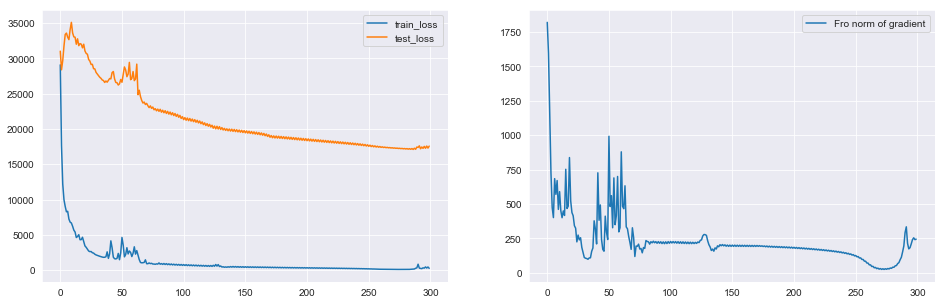

In [209]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1, 2, 1)
>     plt.plot(loss, label='train_loss')
>     plt.plot(test_loss, label='test_loss')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.plot(grad_norm, label='Fro norm of gradient')
>     plt.legend()

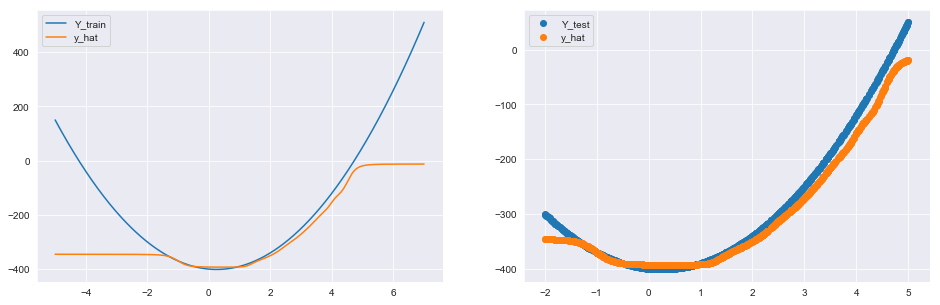

In [210]:
>     plt.figure(figsize=(16,5))
>     plt.subplot(1,2,1)
>     plt.plot(df_test['x'], df_test['y'], label='Y_train')
>     plt.plot(df_test['x'], nn.forward_pass(X_test), label='y_hat')
>     plt.legend()
>     plt.subplot(1,2,2)
>     plt.scatter(df['x'], df['y'], label='Y_test')
>     plt.scatter(df['x'], nn.forward_pass(X), label='y_hat')
>     plt.legend()

Sieć dopasowuje się prawie idealnie do problemu. Jednak na zbiorze testowym, gdzie zakres zmiennej `x` jest trochę szerszy niż w zbiorze treningowym widać, że sieć słabo generalizuje problem.

## Klasyfikacja

## Wczytanie pakietów

In [1]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork
from Layer import Layer
from utils import plot_decision_surface, one_hot_encode
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML
sns.set_style("darkgrid")
np.random.seed(1337)

### Zbiór nr 1 -- XOR

### Wczytanie danych

In [2]:
df = pd.read_csv("Classification//data.XOR.train.1000.csv")
df_test = pd.read_csv("Classification//data.XOR.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

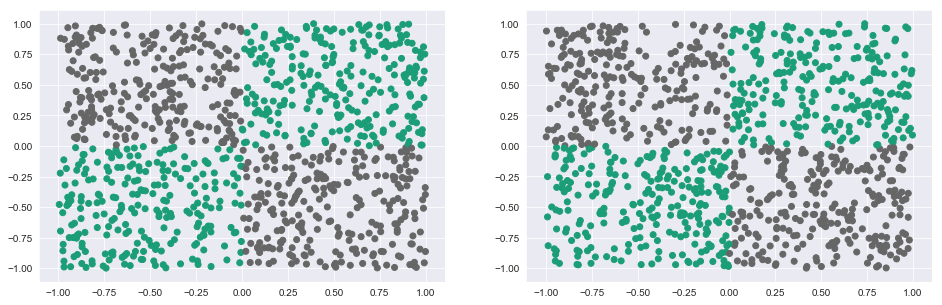

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Jak widać zbiory są dla człowieka łatwo separowalne. Rozkłady na zbiorach testowych i treningowych są takie same, a zatem nie powinno być problemu z rozwiązaniem tego problemu przez sieć.

#### Analiza

In [4]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

Trzeba pamiętać by klasy były w zbiorze $\{0, 1\$}, ponieważ takie założenie przyjmuje funkcja błedu oraz jej pochodna.

In [16]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

Zobaczmy jak zmienia się powierzchnia decyzyjna w zależności od liczby epok (iteracji).

99

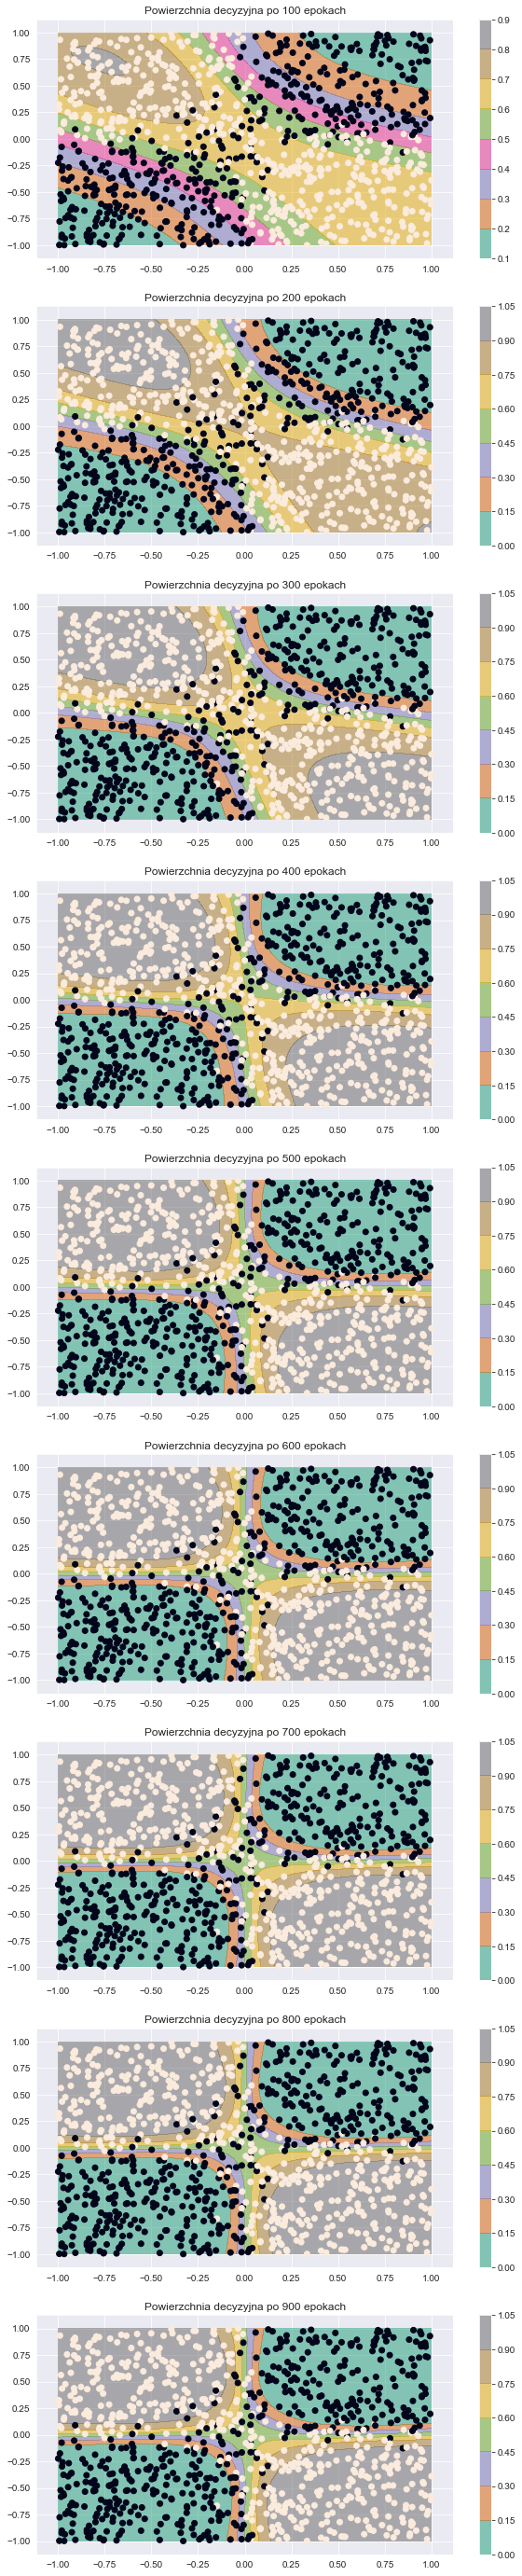

In [17]:
fig, axs = plt.subplots(9, 1, figsize=(10,50))
for i in range(1,10):
    loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=100, learning_rate=1e-0, momentum=0.9)
    im = plot_decision_surface(nn, df_test, proba=True,axis=axs[i-1], cmap='Dark2', alpha=0.5)
    fig.colorbar(im, ax = axs[i-1])
    axs[i-1].scatter(df_test['x'], df_test['y'], c=df_test['cls'])
    axs[i-1].set_title(f"Powierzchnia decyzyjna po {i*100} epokach")
    pass
    

Jak widać sieć z kolejnymi epokami jest coraz bardziej pewna swojej predykcji. Dodatkowo widać, że w miejscu styku obu klas sieć jest dużo mniej pewna niż w obszarze, gdzie występują obiekty tylko jednej klasy.

### Zbiór nr 2 -- zaszumiony XOR

#### Wczytanie danych

In [13]:
df = pd.read_csv("Classification//data.noisyXOR.train.1000.csv")
df_test = pd.read_csv("Classification/data.noisyXOR.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

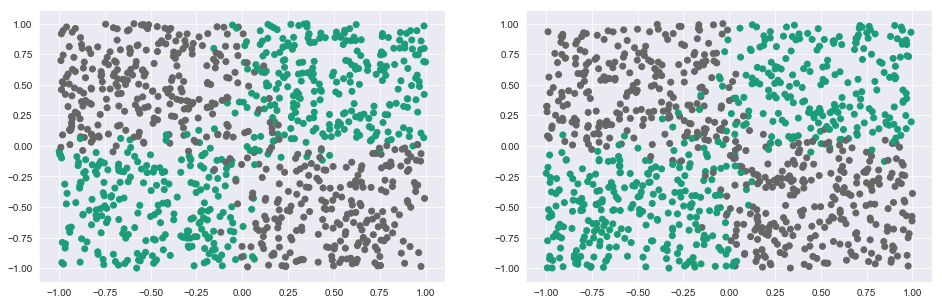

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Mamy do czynienia z zaszumioną wersją poprzedniego zbioru. Zobaczmy jak zmieni to powierzchnie decyzyjną w porównaniu do poprzedniego problemu.

#### Analiza

In [23]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

In [29]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

899

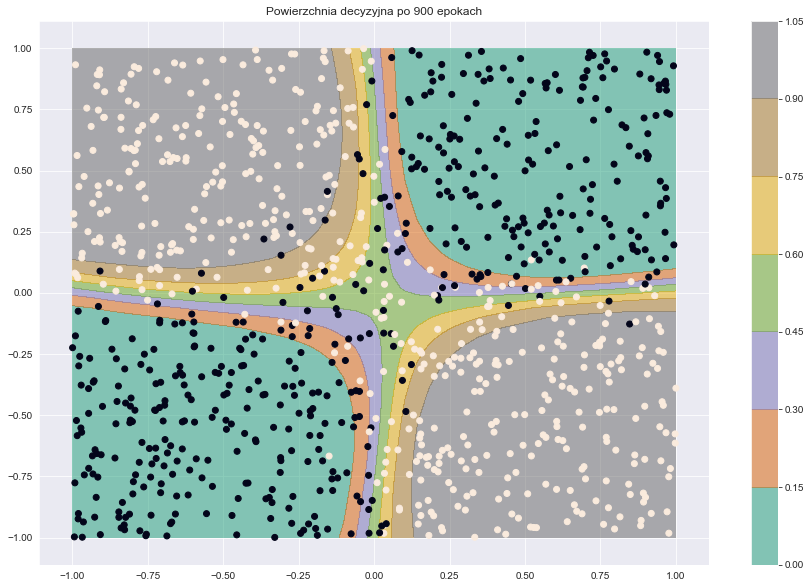

In [30]:
plt.figure(figsize=(15,10))
loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=900, learning_rate=1e-0, momentum=0.9)
im = plot_decision_surface(nn, df_test, proba=True, cmap='Dark2', alpha=0.5)
plt.colorbar(im)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'])
plt.title(f"Powierzchnia decyzyjna po {900} epokach")
pass

Widać, że powierzchnia decyzyjna na tym zbiorze wygląda podobnie do poprzedniej. Jednakże główną różnicą jest szersza przestrzeń, gdzie model nie jest pewny klasy, ponieważ został dodany tam szum.

### Zbiór nr 3 -- „Three Gaussian”

#### Wczytanie danych

In [76]:
np.random.seed(1234)

df = pd.read_csv("MGU_projekt1/Classification/data.three_gauss.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.three_gauss.test.1000.csv")

#### Wizualizacja zbioru treningowego i testowego

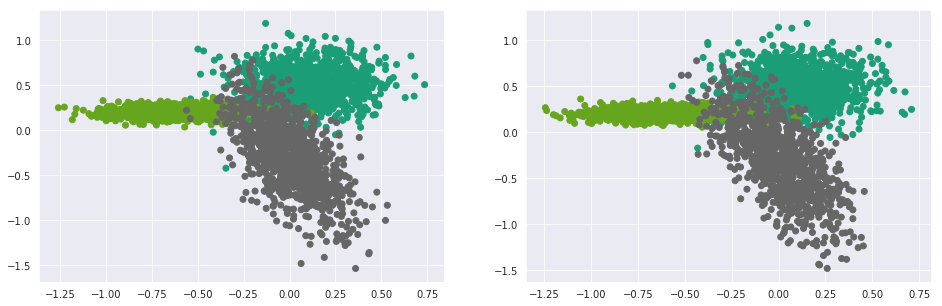

In [77]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Po lewej widzimy zbiór treningowy, a po prawej zbiór testowy. Wszystkie reprezentowane klasy zakrawają o siebie, więc można spodziewać się problemu niedokładnej klasyfikacji przy krawędziach klas.

#### Analiza

Aby spełnić wcześniej wspomniane założenie o etykietach ze zbioru $\{0, 1\}$ zastosujemy funkcję `one_hot_encode`, która z wektora `y` tworzy macierz o liczbie kolumn równej liczbie klas w problemie i wstawia jedynkę w $i$-tej kolumnie, jeśli dany wiersz należy do $i$-tej klasy.

Sieć, którą zastosowaliśmy składa się z trzech warstw -- dwóch sigmoidalnych o kolejno 20 i 30 neuronach oraz warstwy wyjściowej z funkcją aktywacji `softmax`.

In [78]:
X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

In [79]:
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(20, 2, "sigmoid"))
nn.add(Layer(30, 20, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))

Aby uniknąć „wybuchania” gradientu, to jest przyjmowania przez niego bardzo dużych wartości, z początku stosujemy dość niski współczynnik uczenia. Następnie ten współczynnik stopniowo zwiększamy, żeby przyspieszyć proces uczenia

In [80]:
loss1, test_loss1, grad_norm1 = nn.train(
    X_train, one_hot_encode(y_train, 3),
    X_test, one_hot_encode(y_test, 3),
    epochs=80,
    learning_rate=1e-4,
    verbose=False
)

loss2, test_loss2, grad_norm2 = nn.train(
    X_train, one_hot_encode(y_train, 3),
    X_test, one_hot_encode(y_test, 3),
    epochs=100,
    learning_rate=1e-2,
    verbose=False
)

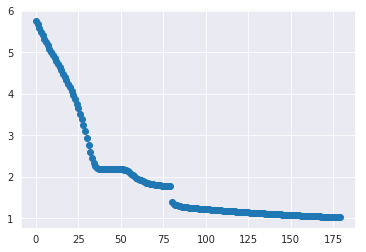

In [81]:
plt.scatter(np.arange(180), loss1+loss2)

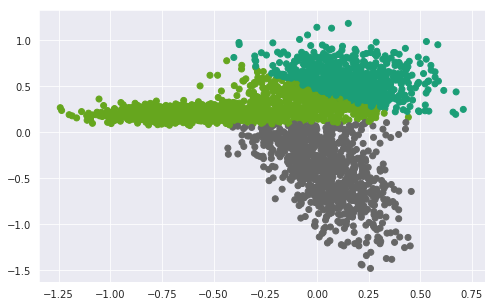

In [82]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Tak jak przewidywaliśmy, sieć najwięcej punktów źle zaklasyfikowała w rejonie nachodzenia na siebie poszczególnych klas.

### Zbiór nr 4 -- „simple”

#### Wczytanie danych

In [83]:
df = pd.read_csv("MGU_projekt1/Classification/data.simple.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.simple.test.1000.csv")

X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

#### Wizualizacja zbioru treningowego i testowego

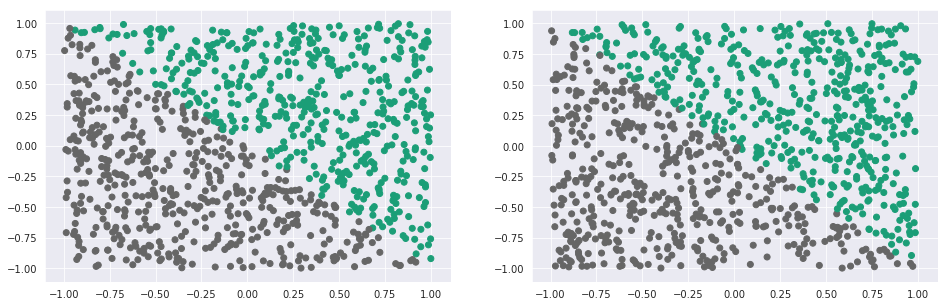

In [84]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Widać, że zbiór jest, jak sama nazwa wskazuje, dość prosty, więc sieć, którą tutaj zastosowaliśmy również jest bardzo prosta. Podobnie jak w przypadku poprzedniego zbioru możemy spodziewać się błędów w klasyfikacji na złączeniu obu klas.

#### Analiza

In [85]:
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(2, 2, "sigmoid"))

In [86]:
loss, test_loss, grad_norm = nn.train(
    X_train, one_hot_encode(y_train, 2),
    X_test, one_hot_encode(y_test, 2),
    epochs=50,
    learning_rate=1
)

49

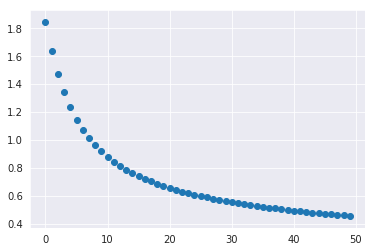

In [87]:
plt.scatter(np.arange(len(loss)), loss)

Błąd bardzo szybko zbiega do zera przy dość dużym współczynniku nauki. Dzięki temu już po 50 epokach otrzymujemy bardzo zadowalające wyniki.

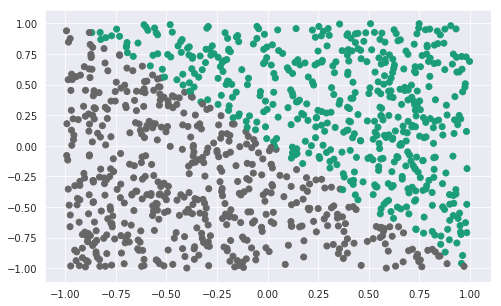

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()

Sieć dość dobrze klasyfikuje punkty, choć ponownie, jak można było się spodziewać, klasyfikacja nie jest idealna, jeśli chodzi o punkty leżące na pograniczu obu klas.

# Zbiór nr 5 -- „circles”

#### Wczytanie danych

In [89]:
df = pd.read_csv("MGU_projekt1/Classification/data.circles.train.1000.csv")
df_test = pd.read_csv("MGU_projekt1/Classification/data.circles.test.1000.csv")

X_train = np.array(df.loc[:, ["x", "y"]])
y_train = np.array(df.cls).reshape(-1, 1)
X_test = np.array(df_test.loc[:, ["x", "y"]])
y_test = np.array(df_test.cls).reshape(-1, 1)

#### Wizualizacja zbioru treningowego i testowego

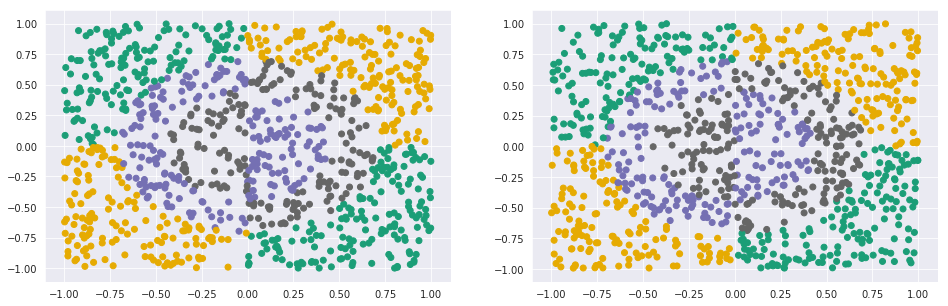

In [90]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

Zbiór ten w widoczny sposób ma wiele klas graniczących ze sobą co sprawia, że klasyfikacja na tym zbiorze nie należy do trywialnych.


#### Analiza

# Podsumowanie
...